# Simulating a model with basico
First some jupyter magic for plotting and convenience

In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


Now import basico

In [2]:
from basico import *

now we are ready to load a model, just adjust the file_name variable, to match yours. 
The file can be a COPASI or SBML file. For this example, the filename lies in the folder where i started the notebook from. 

In [3]:
file_name = './brusselator.cps'

In [4]:
model = load_model(file_name)

now we are ready to simulate. Calling `run_time_course` will run the simulation as specified in the COPASI file and return a pandas dataframe for it. 

In [5]:
run_time_course().head()

,X,Y
Time,,
2.0,0.345934,2.368188
2.5,0.182762,2.658596
3.0,0.147433,2.863681
3.5,0.141129,3.048319
4.0,0.140734,3.228345


for plotting you would then just plot that as one does

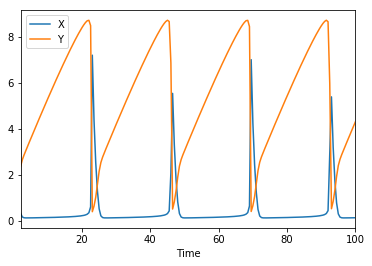

In [6]:
df = run_time_course()
df.plot()

## The run_time_course command
you can change different options for the time course by adding named parameters into the `run_time_course_command`. Supported are: 

* `model`: incase you want to use another model than the one last loaded
* `scheduled`: to mark the model as scheduled
* `update_model`: to update the initial state after the simulation is run
* `duration`: to specify how long the simulation is run
* `automatic`: in case you would like automatic step size being used
* `output_event`: in case you would like to have the event values before and after the event hit listed
* `start_time`: to change the start time
* `step_number` or `interals`: to overwrite the number of steps being used


so lets run two simulations that will be different slightly, as we will use the `update_model` flag:

In [7]:
df1 = run_time_course(update_model=True)
df2 = run_time_course(update_model=True)

(<matplotlib.axes._subplots.AxesSubplot at 0xd7c7588>,
 <matplotlib.axes._subplots.AxesSubplot at 0xdbaea20>)

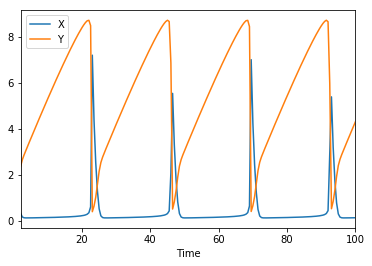

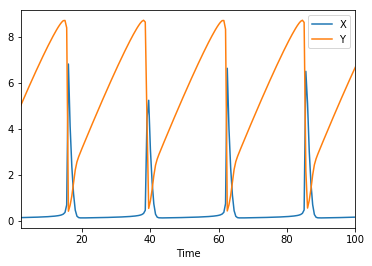

In [8]:
df1.plot(), df2.plot()

And now you could plot the difference between them too: 

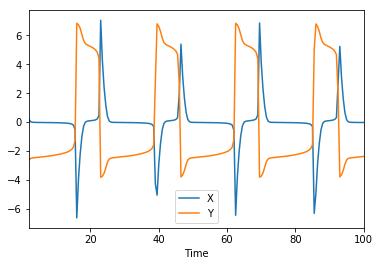

In [9]:
(df1-df2).plot()

In [10]:
(df1-df2).describe()

,X,Y
count,197.000000,197.000000
mean,-0.014562,-0.123916
std,1.592729,3.615933
min,-6.630084,-3.816620
25%,-0.056936,-2.428037
50%,-0.024780,-2.245888
75%,0.077394,4.837513
max,7.051794,6.844179
